In [52]:
import pandas as pd
import os

In [53]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shrutimechlearn/churn-modelling")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\smc\.cache\kagglehub\datasets\shrutimechlearn\churn-modelling\versions\1


In [54]:
file=os.listdir(path)
file

['Churn_Modelling.csv']

In [55]:
df=pd.read_csv(os.path.join(path ,'Churn_Modelling.csv'))

In [56]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [57]:
cols= ['RowNumber'	,'CustomerId',	'Surname' ,'Geography'	,'Gender']

In [58]:
df.drop(cols , axis=1 , inplace=True)

In [59]:
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [60]:
df.shape

(10000, 9)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.3 KB


In [62]:
x=df.iloc[:,:-1]

In [63]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [64]:
y=df['Exited']

In [65]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
ss= StandardScaler()
ss.fit_transform(x)

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [68]:
x=pd.DataFrame(ss.fit_transform(x) , columns=x.columns )

In [69]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [70]:
x.shape

(10000, 8)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_test , y_train , y_test = train_test_split(x , y , test_size=0.2, random_state=10)

In [73]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
937,2.063884,0.484225,-0.004426,0.835324,-0.911583,-1.547768,0.970243,1.234723
9355,0.915392,0.102810,1.032908,-1.225848,-0.911583,0.646092,-1.030670,1.164024
2293,0.398053,0.579578,-1.733315,-0.299734,-0.911583,0.646092,-1.030670,1.699145
192,-1.774770,0.102810,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,0.259204
8675,0.656722,1.437761,0.687130,0.795384,-0.911583,0.646092,-1.030670,0.220617
...,...,...,...,...,...,...,...,...
5624,-0.346915,0.579578,-1.387538,-1.225848,-0.911583,0.646092,-1.030670,0.751341
6005,-0.150326,-1.422847,1.378686,-1.225848,0.807737,-1.547768,0.970243,-1.065242
987,-0.843560,-0.469311,-1.733315,1.207697,-0.911583,0.646092,-1.030670,0.038422
6152,-1.474714,2.391296,-1.041760,-1.225848,-0.911583,0.646092,0.970243,-1.634803


## Overfitting Early Stopping

In [74]:
import tensorflow
from keras.layers import Dense 
from keras.regularizers import L2
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [75]:
ann=Sequential()

In [100]:
ann.add(Dense(6 , input_dim=8 , activation='relu', kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(4, activation='relu', kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(2 , activation='relu', kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(1 ,activation='sigmoid'))


C:\Users\smc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
ann.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [102]:
ann.fit(x_train , y_train , batch_size=100 , epochs=30 , validation_data=(x_test , y_test), callbacks=EarlyStopping())     

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7631 - loss: 0.7720 - val_accuracy: 0.7890 - val_loss: 0.7382
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8080 - loss: 0.7266 - val_accuracy: 0.7890 - val_loss: 0.7008
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7991 - loss: 0.6911 - val_accuracy: 0.7890 - val_loss: 0.6704
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7958 - loss: 0.6622 - val_accuracy: 0.7890 - val_loss: 0.6452
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7998 - loss: 0.6362 - val_accuracy: 0.7890 - val_loss: 0.6240
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8020 - loss: 0.6145 - val_accuracy: 0.7890 - val_loss: 0.6063
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7970 - loss: 0.5989 - val_accuracy: 0.7890 - val_loss: 0.5915
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7982 - loss: 0.5836 - val_accuracy: 0.7890 - val_loss

In [103]:
train_acc=ann.history.history['accuracy']
# training accuracy after validation we got testing too
test_acc=ann.history.history['val_accuracy']


In [104]:
len(test_acc)

30

In [83]:
import matplotlib.pyplot as plt

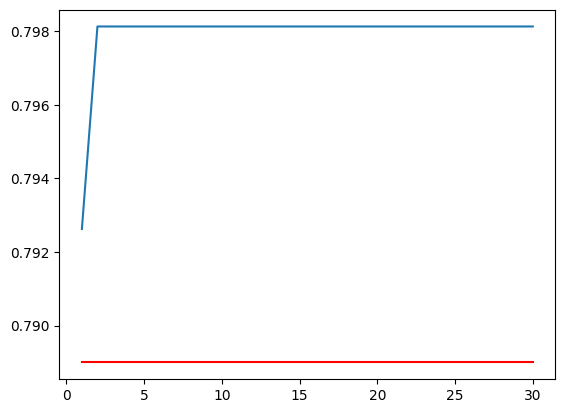

In [105]:
plt.plot([i for i in range(1,31)], train_acc)
plt.plot([i for i in range(1,31)], test_acc, c='red')
plt.show()


In [106]:
pred=ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [107]:
prd_data= []
for i in pred:
    if i[0]>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(y_test , prd_data)*100

78.9

In [110]:
pred1=ann.predict(x_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [111]:
prd_data1= []
for i in pred1:
    if i[0]>0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

In [112]:
accuracy_score(y_train , prd_data1)*100


79.8125

In [113]:
import matplotlib.pyplot as plt

In [114]:
ann.history.history
# training accuracy after validation we got testing too


{'accuracy': [0.7926250100135803,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295,
  0.7981250286102295],
 'loss': [0.760377824306488,
  0.7181472778320312,
  0.6837007403373718,
  0.655173122882843,
  0.6314102411270142,
  0.6114280819892883,
  0.594578742980957,
  0.5803075432777405,
  0.5681991577148438,
  0.5578771829605103,
  0.5491496324539185,
  0.5417429804801941,
  0.5354453325271606,
  0.5301057696342468,
  0.5255862474